In [1]:
import os,sys
import numpy as np
import tensorflow as tf
import vgg_net
from rcnn_train.toydata_generator import ToydataGenerator
from rcnn_train.shower_generator import make_shower, make_showerset
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
load_file = '../model/ckpt-499'

In [3]:
sess = tf.InteractiveSession()

data_tensor    = tf.placeholder(tf.float32,  [None, 256*256],name='x')
data_tensor_2d = tf.reshape(data_tensor,[-1,256,256,1])
label_tensor   = tf.placeholder(tf.int64, [None],name='labels')
prediction_tensor = tf.placeholder(tf.int64, [None],name='labels')

#RESHAPE IMAGE IF NEED BE                                                     
#tf.summary.image('input',data_tensor_2d,10)

net = vgg_net.build(input_tensor=data_tensor_2d, num_classes=2)

with tf.name_scope('softmax'):
  softmax = tf.nn.softmax(logits=net)

with tf.name_scope('accuracy'):
  correct_prediction = tf.equal(tf.argmax(net,1), label_tensor)
  accuracy = tf.cast(correct_prediction, tf.float32)

In [4]:
if load_file:
  print "reading in model variables..."
  vlist = tf.get_collection(tf.GraphKeys.TRAINABLE_VARIABLES)
  reader = tf.train.Saver(var_list=vlist)
  reader.restore(sess, load_file)

reading in model variables...
INFO:tensorflow:Restoring parameters from ../model/ckpt-499


In [16]:
%%capture
test_angles = np.arange(0, 50, 1)+0.001
s_arr = np.zeros((test_angles.shape))
a_arr = np.zeros((test_angles.shape))

for i in range(len(test_angles)):
    args = dict(
        nx = 256,        
        ny = 256,      
        nlines = 10,     
        dtheta = np.radians(test_angles[i]),
        lmin = 30,
        lmax = 100,
        keep = 7,
        keep_prob = 0.6,
        nimages = 100,
        out_png = False,
        )

    blob = make_showerset(args);
    a = accuracy.eval(feed_dict={data_tensor: blob['data'].reshape(-1, 256*256), label_tensor: blob['labels']})
    s = softmax.eval(feed_dict={data_tensor: blob['data'].reshape(-1, 256*256)})
    a_arr[i] = np.mean(a)
    s_arr[i] = np.mean(s[:,0])

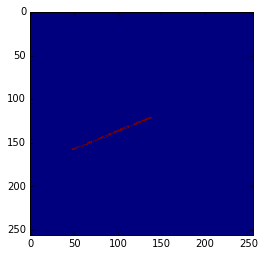

In [22]:
view_i = 0
args = dict(
        nx = 256,        
        ny = 256,      
        nlines = 10,     
        dtheta = np.radians(test_angles[view_i]),
        lmin = 30,
        lmax = 100,
        keep = 7,
        keep_prob = 0.6,
        nimages = 10,
        out_png = False,
        )

blob = make_showerset(args)

plt.imshow(blob['data'].reshape(-1, 256, 256)[3,:,:])

In [10]:
a = accuracy.eval(feed_dict={data_tensor: blob['data'].reshape(-1, 256*256), label_tensor: blob['labels']})

s = softmax.eval(feed_dict={data_tensor: blob['data'].reshape(-1, 256*256)})

(array([ 12.,   3.,   2.,   2.,   2.,   3.,   3.,   1.,   7.,  65.]),
 array([  1.52040820e-06,   1.00001368e-01,   2.00001216e-01,
          3.00001064e-01,   4.00000912e-01,   5.00000760e-01,
          6.00000608e-01,   7.00000456e-01,   8.00000304e-01,
          9.00000152e-01,   1.00000000e+00]),
 <a list of 10 Patch objects>)

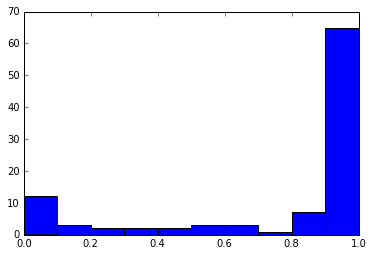

In [23]:
plt.hist(s[:,view_i])

(-5, 103.002)

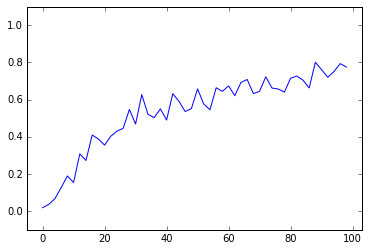

In [19]:
plt.plot(test_angles*2, s_arr)
plt.ylim(-0.1, 1.1)
plt.xlim(-5, (test_angles*2)[-1]+5)

(-5, 103.002)

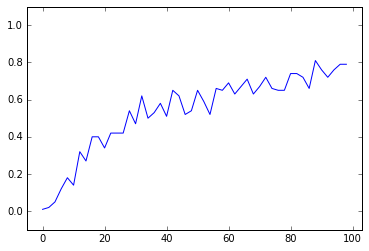

In [20]:
plt.plot(test_angles*2, a_arr)
plt.ylim(-0.1, 1.1)
plt.xlim(-5, (test_angles*2)[-1]+5)